1/1 [==============================] - 1s 1s/step


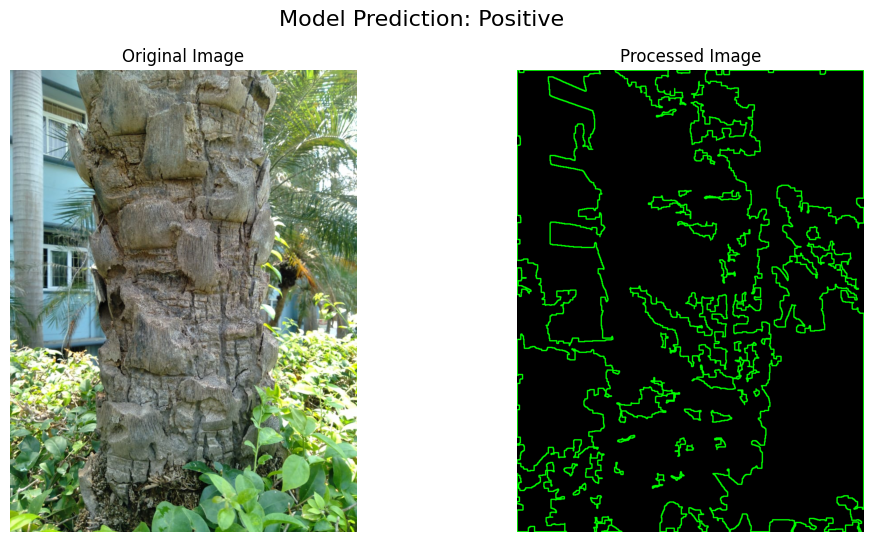

In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
loaded_model = load_model('tuned_basil_stem_rot_model.h5')

# File path for the input image
input_image_path = '1.jpeg'

# Function to predict the class of an image with a threshold
def predict_image_class(model, img_path, threshold=0.5):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale to [0,1]
    prediction = model.predict(img_array)
    
    # Use threshold to classify as 0 or 1
    predicted_label = 1 if prediction[0, 0] > threshold else 0
    
    return predicted_label

# Function to preprocess the input image
def preprocess_stem_image(input_path):
    # Read the image
    original_image = cv2.imread(input_path)

    # Convert to grayscale
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    # Apply adaptive thresholding
    _, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform morphological operations (erosion and dilation)
    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours in the image
    contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (noise)
    min_contour_area = 100
    valid_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]

    # Draw the contours on a blank image
    result_image = np.zeros_like(original_image)
    cv2.drawContours(result_image, valid_contours, -1, (0, 255, 0), 2)

    return original_image, result_image

# Preprocess the input image
original_input, processed_input = preprocess_stem_image(input_image_path)

# Predict the class of the input image
predicted_label = predict_image_class(loaded_model, input_image_path, threshold=0.5)

# Display the original and processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_input, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_input, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')
plt.axis('off')

# Display the prediction
prediction_text = 'Positive' if predicted_label == 1 else 'Negative'
plt.suptitle(f'Model Prediction: {prediction_text}', fontsize=16)
plt.show()


1/1 [==============================] - 1s 1s/step


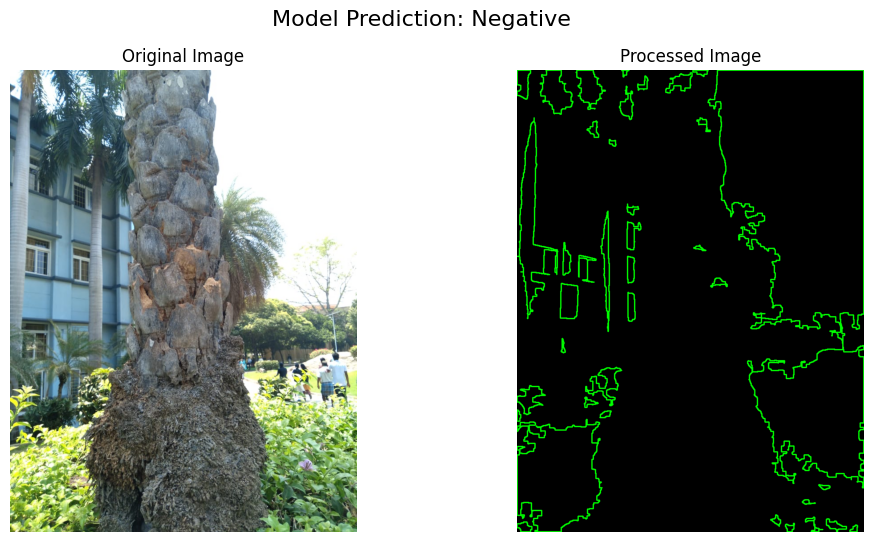

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
loaded_model = load_model('tuned_basil_stem_rot_model.h5')

# File path for the input image
input_image_path = '2.jpeg'

# Function to predict the class of an image with a threshold
def predict_image_class(model, img_path, threshold=0.5):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale to [0,1]
    prediction = model.predict(img_array)
    
    # Use threshold to classify as 0 or 1
    predicted_label = 1 if prediction[0, 0] > threshold else 0
    
    return predicted_label

# Function to preprocess the input image
def preprocess_stem_image(input_path):
    # Read the image
    original_image = cv2.imread(input_path)

    # Convert to grayscale
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur for noise reduction
    blurred_image = cv2.GaussianBlur(grayscale_image, (5, 5), 0)

    # Apply adaptive thresholding
    _, thresholded_image = cv2.threshold(blurred_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform morphological operations (erosion and dilation)
    kernel = np.ones((5, 5), np.uint8)
    morph_image = cv2.morphologyEx(thresholded_image, cv2.MORPH_CLOSE, kernel, iterations=2)

    # Find contours in the image
    contours, _ = cv2.findContours(morph_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (noise)
    min_contour_area = 100
    valid_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]

    # Draw the contours on a blank image
    result_image = np.zeros_like(original_image)
    cv2.drawContours(result_image, valid_contours, -1, (0, 255, 0), 2)

    return original_image, result_image

# Preprocess the input image
original_input, processed_input = preprocess_stem_image(input_image_path)

# Predict the class of the input image
predicted_label = predict_image_class(loaded_model, input_image_path, threshold=0.5)

# Display the original and processed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_input, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_input, cv2.COLOR_BGR2RGB))
plt.title('Processed Image')
plt.axis('off')

# Display the prediction
prediction_text = 'Positive' if predicted_label == 1 else 'Negative'
plt.suptitle(f'Model Prediction: {prediction_text}', fontsize=16)
plt.show()
